<a href="https://colab.research.google.com/github/SeifAmr1/Water-Potability-Classification/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Adding Nan Values

In [ ]:
features_df = df.drop('Potability', axis=1)

nan_counts = features_df.isna().sum()
nan_counts

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

In [ ]:
features_df.fillna(features_df.mean(), inplace=True)
features_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

## Visualization

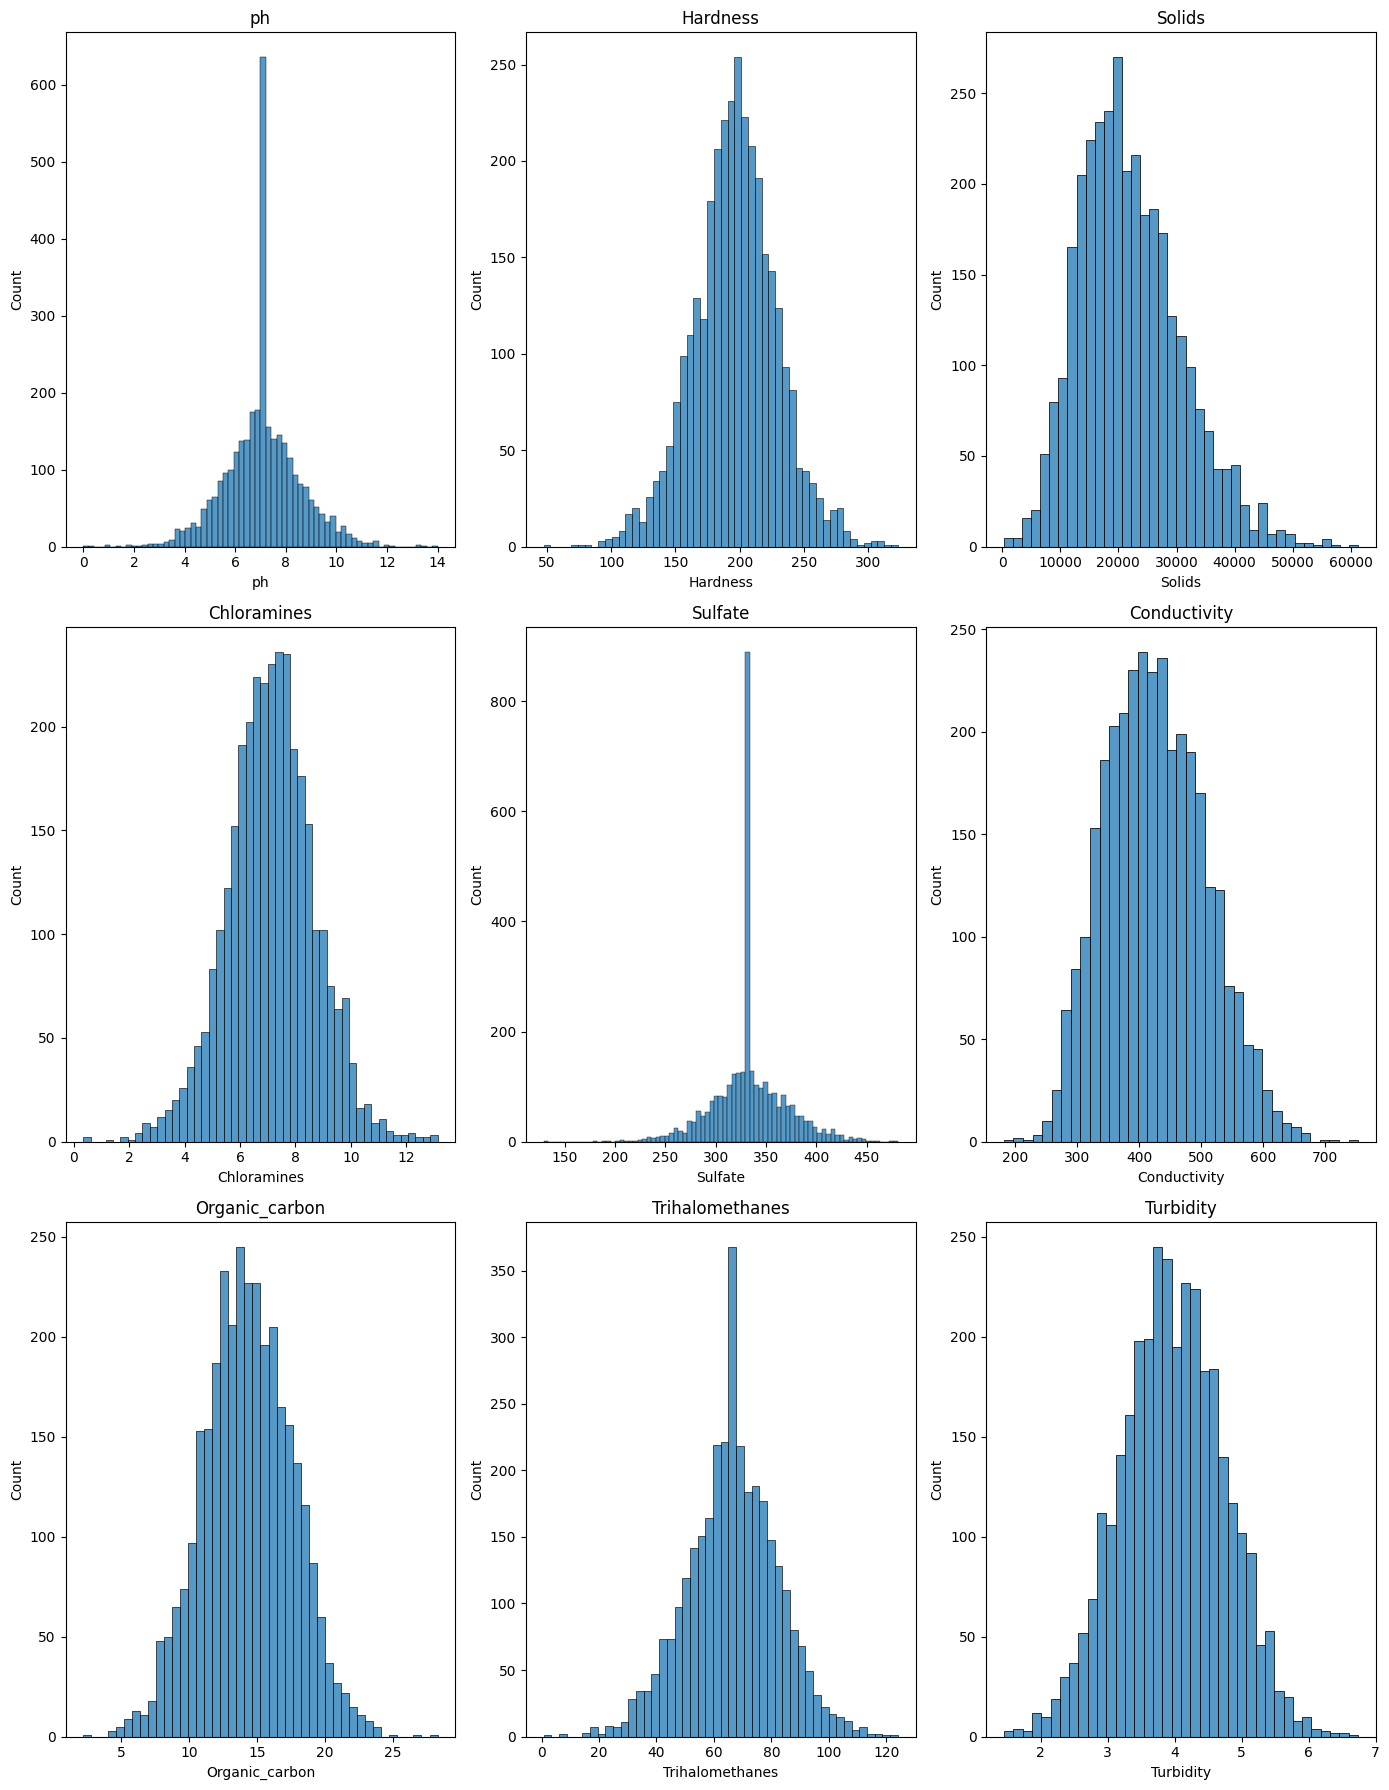

In [ ]:
num_cols = 3
num_rows = (len(features_df.columns) // num_cols)

plt.figure(figsize=(14, 6*num_rows))
for i, col in enumerate(features_df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(features_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

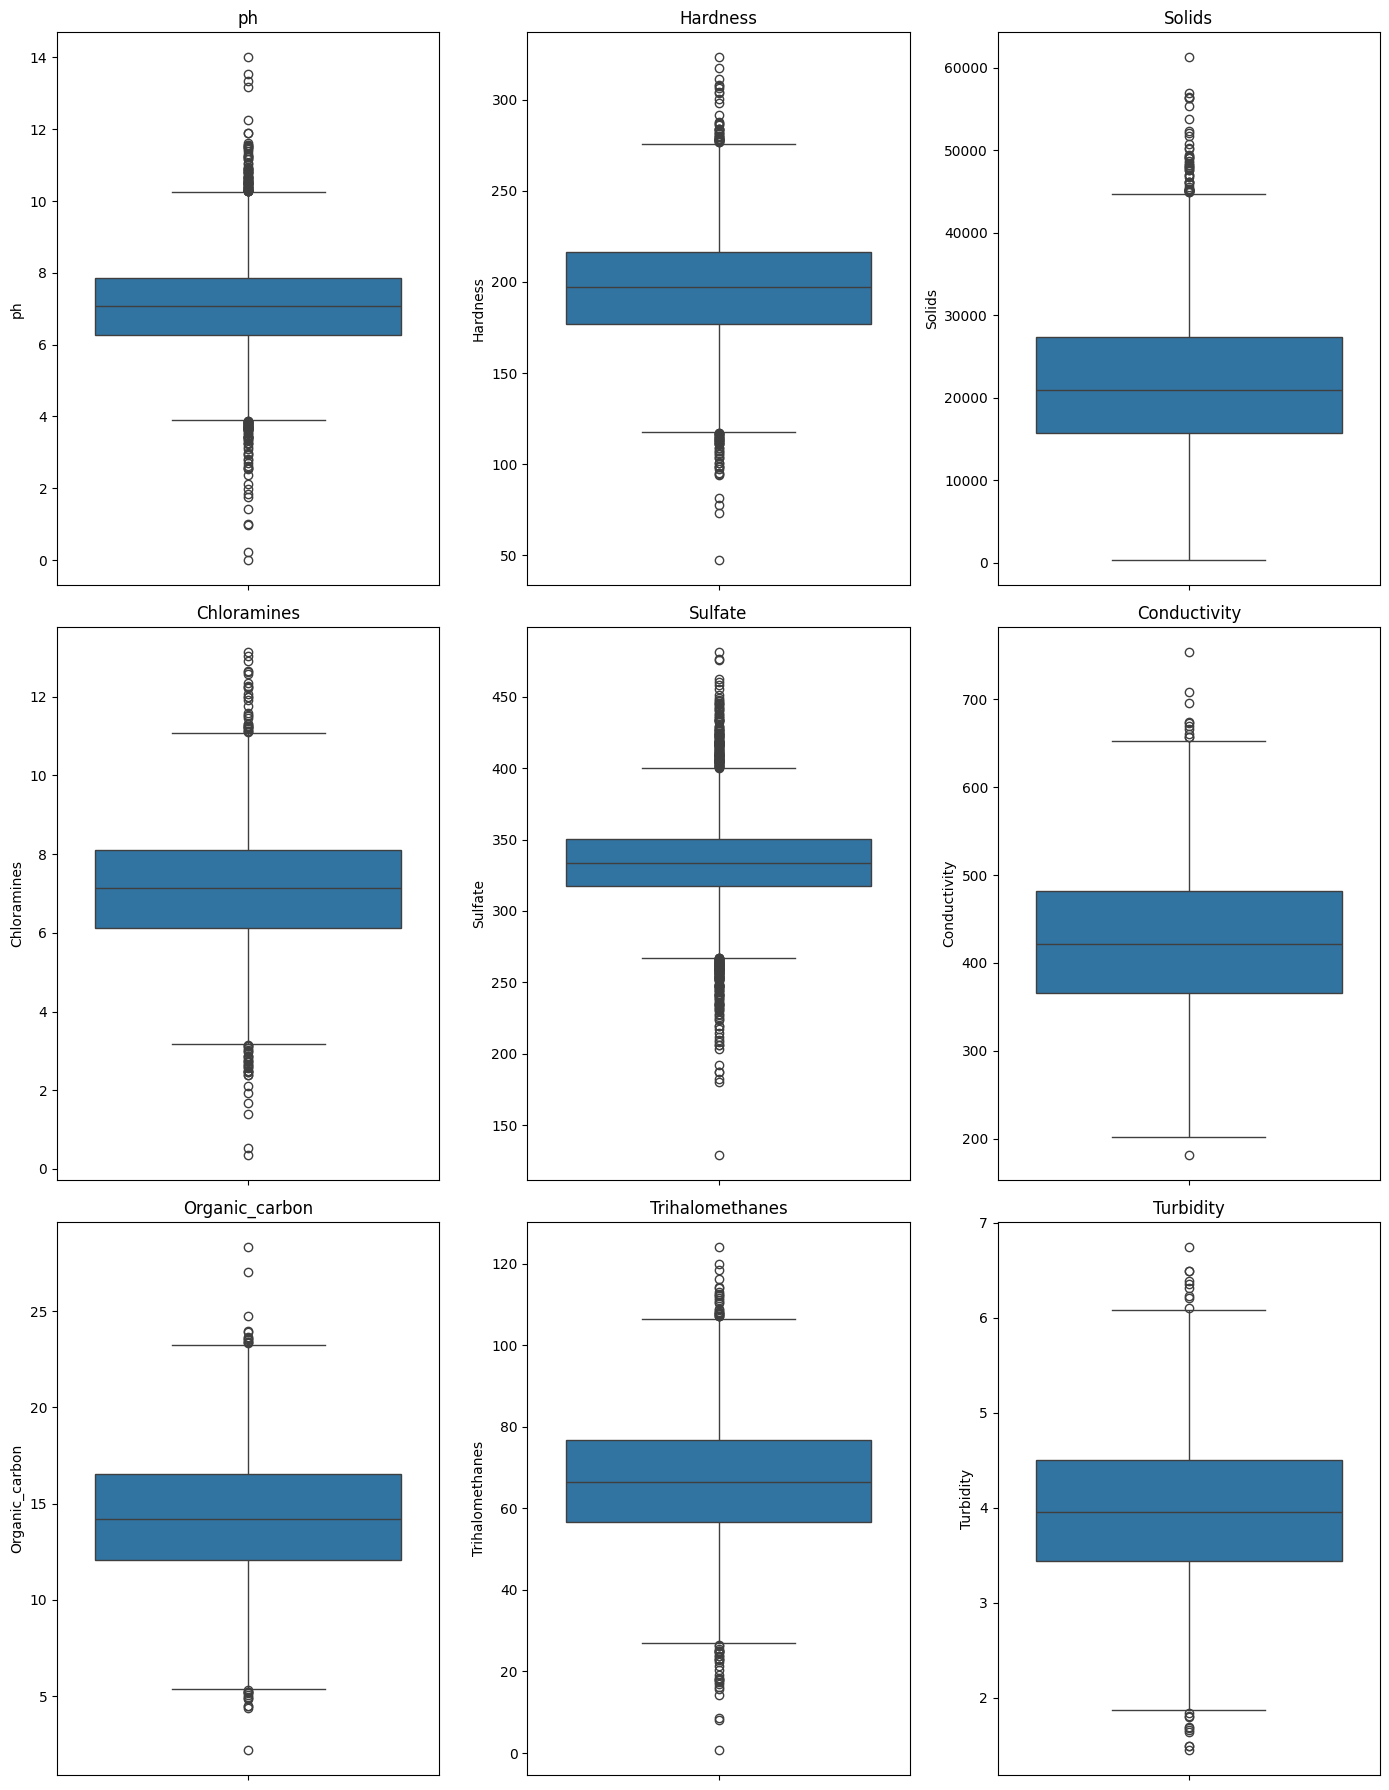

In [ ]:
num_cols = 3
num_rows = (len(features_df.columns) // num_cols)

plt.figure(figsize=(14, 6*num_rows))
for i, col in enumerate(features_df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(features_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Detect Outliers

In [ ]:
Q1 = features_df.quantile(0.25)
Q3 = features_df.quantile(0.75)

IQR = Q3 - Q1

outliers = (features_df < (Q1 - 1.5 * IQR)) | (features_df > (Q3 + 1.5 * IQR))
outliers.sum()

outlier_rows = features_df[outliers.any(axis=1)].index.tolist()

df = df.drop(outlier_rows, axis=0)

In [ ]:
df['Potability']

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64

In [ ]:
print("Before removing outliers: ", features_df.shape)
features_df = features_df[~outliers.any(axis=1)]
print("After removing outliers:", features_df.shape)

Before removing outliers:  (3276, 9)
After removing outliers: (2666, 9)


## Normalization

In [ ]:
min_max_scaler = MinMaxScaler()
features_df_min_max = pd.DataFrame(min_max_scaler.fit_transform(features_df), columns=features_df.columns)
features_df_min_max.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.500496,0.547502,0.461758,0.520207,0.761347,0.804335,0.280742,0.754090,0.258967
1,0.660854,0.670803,0.441867,0.770560,0.500280,0.481211,0.643817,0.493079,0.281003
2,0.695127,0.607942,0.489438,0.616401,0.673948,0.358484,0.731546,0.923489,0.654492
3,0.817239,0.395881,0.398319,0.424711,0.322632,0.436423,0.346683,0.056319,0.523011
4,0.264806,0.441846,0.641255,0.551209,0.446945,0.174862,0.169951,0.347135,0.163169


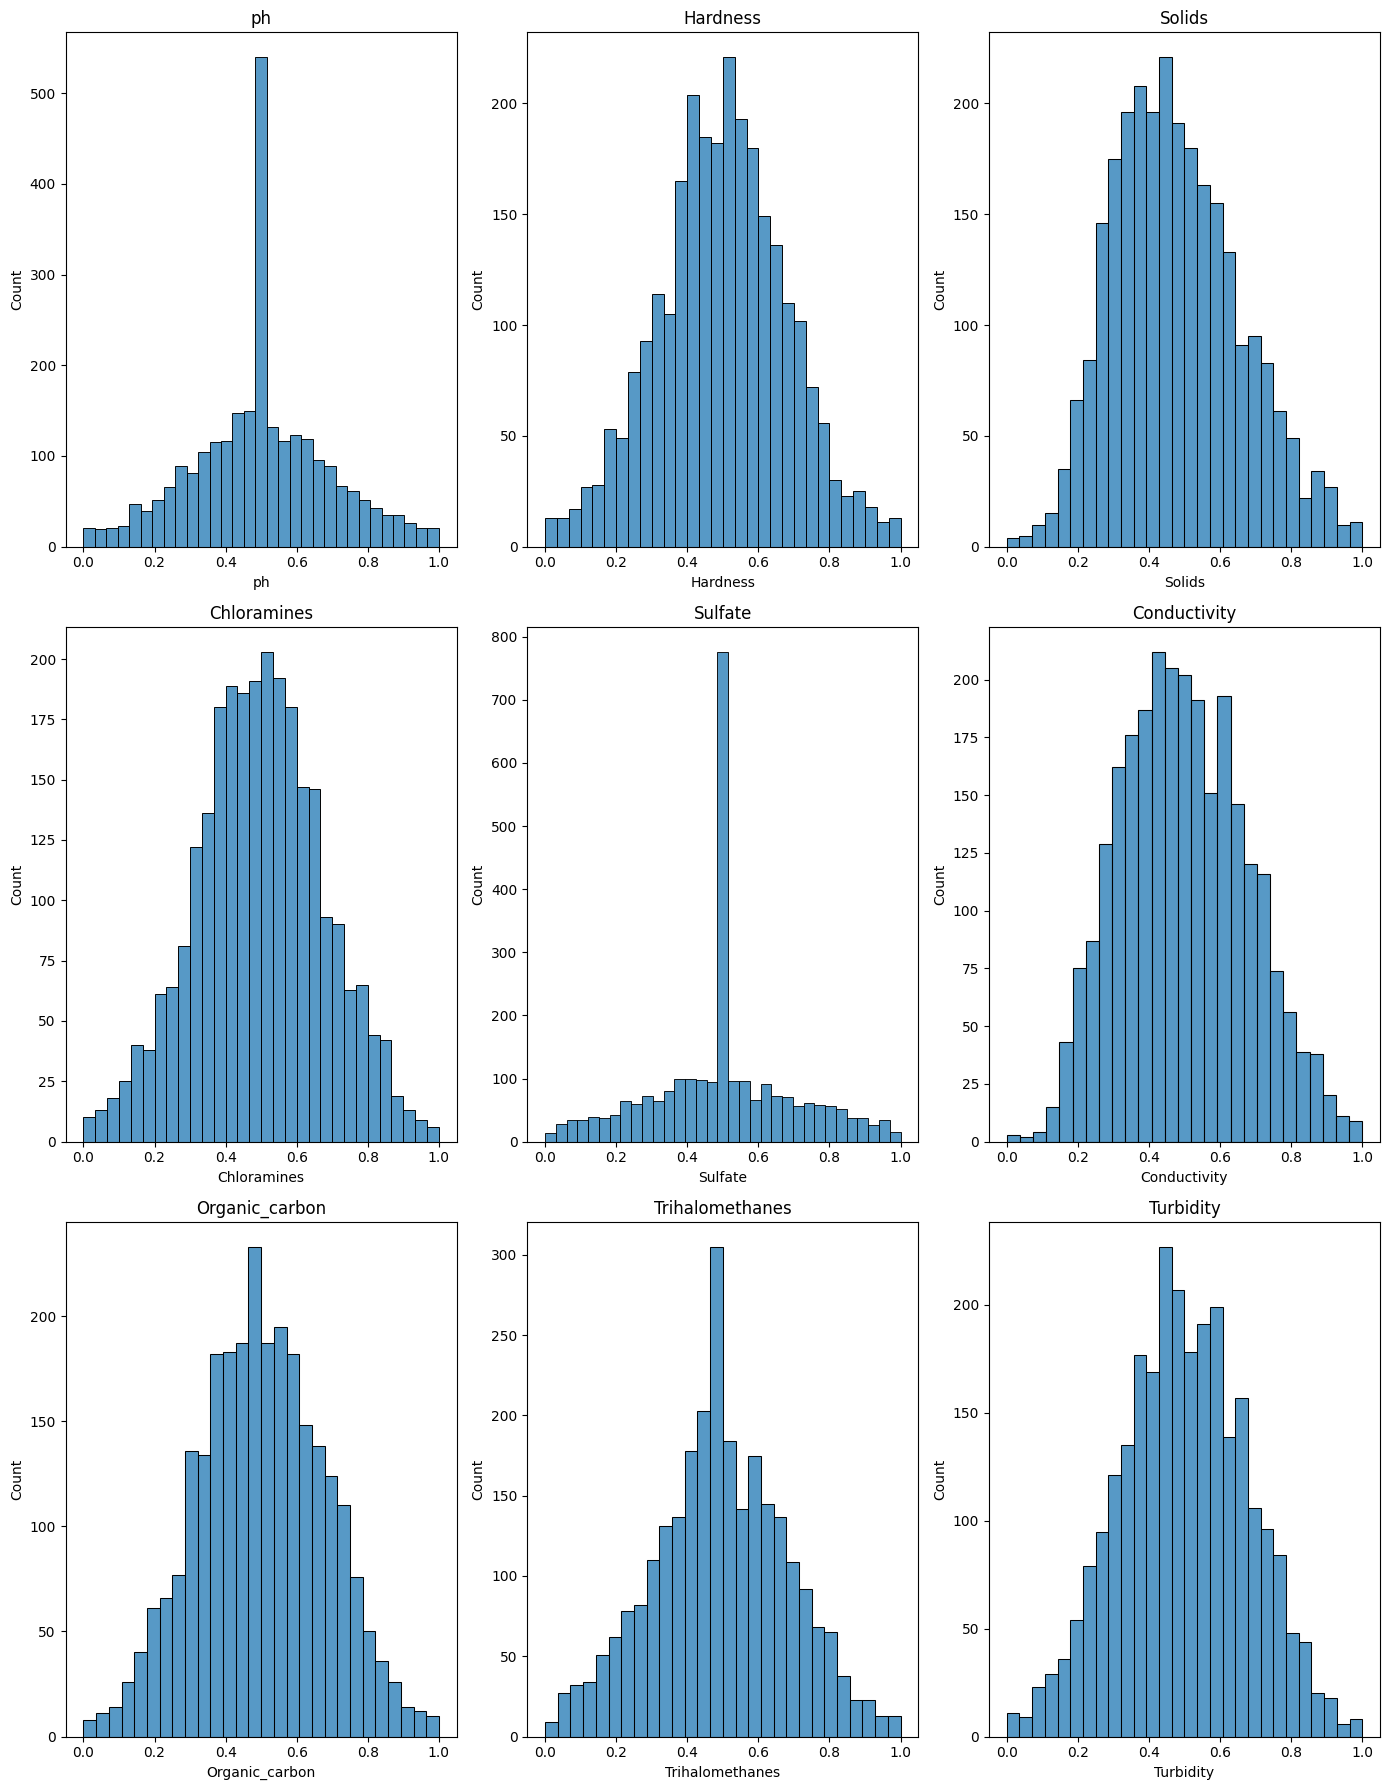

In [ ]:
num_cols = 3
num_rows = (len(features_df_min_max.columns) // num_cols)

plt.figure(figsize=(14, 6*num_rows))
for i, col in enumerate(features_df_min_max.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(features_df_min_max[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Dataframe after above steps is

```
features_df_min_max
```



## Correlation

In [ ]:
cor = features_df_min_max.corr()
cor

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.131362,-0.087036,-0.062888,0.016894,0.001943,0.026160,0.009172,-0.043034
Hardness,0.131362,1.000000,-0.045552,-0.035832,-0.027939,-0.030415,0.012463,-0.007093,-0.022362
Solids,-0.087036,-0.045552,1.000000,-0.040392,-0.110090,0.007087,0.026793,-0.024550,0.022801
Chloramines,-0.062888,-0.035832,-0.040392,1.000000,0.024502,-0.015277,-0.000684,0.016574,-0.005415
Sulfate,0.016894,-0.027939,-0.110090,0.024502,1.000000,-0.005850,-0.007588,-0.022269,-0.017310
Conductivity,0.001943,-0.030415,0.007087,-0.015277,-0.005850,1.000000,0.006515,-0.001138,0.007674
Organic_carbon,0.026160,0.012463,0.026793,-0.000684,-0.007588,0.006515,1.000000,-0.000059,-0.016705
Trihalomethanes,0.009172,-0.007093,-0.024550,0.016574,-0.022269,-0.001138,-0.000059,1.000000,-0.024269
Turbidity,-0.043034,-0.022362,0.022801,-0.005415,-0.017310,0.007674,-0.016705,-0.024269,1.000000


In [ ]:
if 'Potability' in features_df_min_max.columns:
    features_df_min_max = features_df_min_max.drop('Potability', axis=1)
correlation_with_output = features_df_min_max.corrwith(df['Potability'])
print(correlation_with_output)



ph                -0.005949
Hardness          -0.000710
Solids             0.005600
Chloramines        0.013195
Sulfate           -0.003741
Conductivity      -0.001886
Organic_carbon    -0.027090
Trihalomethanes    0.014351
Turbidity          0.004761
dtype: float64


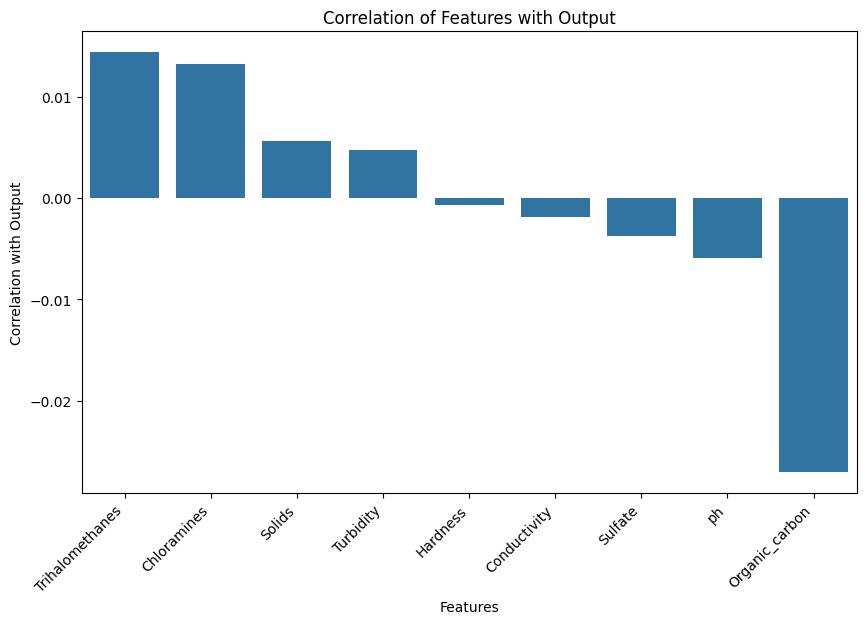

In [ ]:
sorted_correlation = correlation_with_output.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with Output')
plt.title('Correlation of Features with Output')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

from sklearn.model_selection import GridSearchCV

## Data split

In [ ]:
df = df.reset_index(drop=True)
features_df_min_max = features_df_min_max.reset_index(drop=True)

features_df_min_max['Potability']= df['Potability']

X = features_df_min_max.drop('Potability', axis=1)
Y = features_df_min_max['Potability']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_validation.shape, Y_validation.shape

((1599, 9), (1599,), (534, 9), (534,), (533, 9), (533,))

## Neural Network

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=X_train.shape[1]),

        Dense(32, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ], name="model"
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 593 (2.32 KB)
Trainable params: 593 (2.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation))

Epoch 1/50
50/50 [==============================] - 1s 7ms/step - loss: 0.2367 - accuracy: 0.6210 - val_loss: 0.2351 - val_accuracy: 0.6304
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.6210 - val_loss: 0.2353 - val_accuracy: 0.6304
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.6210 - val_loss: 0.2349 - val_accuracy: 0.6304
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.6210 - val_loss: 0.2343 - val_accuracy: 0.6304
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.6210 - val_loss: 0.2344 - val_accuracy: 0.6304
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.6210 - val_loss: 0.2342 - val_accuracy: 0.6304
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.6210 - val_loss: 0.2342 - val_accuracy: 0.6304
Epoch 8/50
50/50 [==

In [ ]:
predictions_nn = model.predict(X_test)
y_pred_nn = [1 if p >= 0.5 else 0 for p in predictions_nn]

accuracy_nn = accuracy_score(Y_test, y_pred_nn)
precision_nn = precision_score(Y_test, y_pred_nn)
recall_nn = recall_score(Y_test, y_pred_nn)
f1_nn = f1_score(Y_test, y_pred_nn)

print("Neural Network Test Scores Without Hyperparameters:")
print(f'Test Accuracy Score: {accuracy_nn}')
print(f'Test Precision Score: {precision_nn}')
print(f'Test Recall Score: {recall_nn}')
print(f'Test F1-score Score: {f1_nn}')

17/17 [==============================] - 0s 2ms/step
Neural Network Test Scores Without Hyperparameters:
Test Accuracy Score: 0.6704119850187266
Test Precision Score: 0.625
Test Recall Score: 0.20833333333333334
Test F1-score Score: 0.3125


In [ ]:
from sklearn.neural_network import MLPClassifier

param_grid_nn = {
    'hidden_layer_sizes': [(3,), (4,), (8,), (20),],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [100]
}

grid_search_nn = GridSearchCV(MLPClassifier(), param_grid_nn, cv=5)

grid_search_nn.fit(X_train, Y_train)

best_params_nn = grid_search_nn.best_params_

means_nn = grid_search_nn.cv_results_['mean_test_score']
params_nn = grid_search_nn.cv_results_['params']
for mean, param in zip(means_nn, params_nn):
    print(f"Mean accuracy: {mean:.3f} using {param}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': (3,), 'max_iter': 100, 'solver': 'adam'}
Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': (3,), 'max_iter': 100, 'solver': 'sgd'}
Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': (4,), 'max_iter': 100, 'solver': 'adam'}
Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': (4,), 'max_iter': 100, 'solver': 'sgd'}
Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': (8,), 'max_iter': 100, 'solver': 'adam'}
Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': (8,), 'max_iter': 100, 'solver': 'sgd'}
Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': 20, 'max_iter': 100, 'solver': 'adam'}
Mean accuracy: 0.621 using {'activation': 'logistic', 'hidden_layer_sizes': 20, 'max_iter': 100, 'solver': 'sgd'}
Mean accuracy: 0.621 using {'activation': 'relu', 'hidden_layer_sizes': 

In [ ]:
print("Neural Network Hyperparameters")
print(best_params_nn)
print("\n")

best_hidden_layer_sizes = best_params_nn['hidden_layer_sizes']
best_activation = best_params_nn['activation']
best_solver = best_params_nn['solver']
best_max_iter = best_params_nn['max_iter']

best_nn_model = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, activation=best_activation,
                              solver=best_solver, max_iter=best_max_iter)

X_train_val_combined = np.concatenate((X_train, X_validation))
Y_train_val_combined = np.concatenate((Y_train, Y_validation))

best_nn_model.fit(X_train_val_combined, Y_train_val_combined)

predictions_test_nn = best_nn_model.predict(X_test)

accuracy_nn = accuracy_score(Y_test, predictions_test_nn)
precision_nn = precision_score(Y_test, predictions_test_nn)
recall_nn = recall_score(Y_test, predictions_test_nn)
f1_nn = f1_score(Y_test, predictions_test_nn)

print("Neural Network Test Scores While Using Hyperparameters:")
print(f'Test Accuracy Score: {accuracy_nn}')
print(f'Test Precision Score: {precision_nn}')
print(f'Test Recall Score: {recall_nn}')
print(f'Test F1-score Score: {f1_nn}')


Neural Network Hyperparameters
{'activation': 'relu', 'hidden_layer_sizes': 20, 'max_iter': 100, 'solver': 'sgd'}


Neural Network Test Scores While Using Hyperparameters:
Test Accuracy Score: 0.6404494382022472
Test Precision Score: 0.0
Test Recall Score: 0.0
Test F1-score Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [ ]:
predictions_svc = svc.predict(X_test)
y_pred_svc = [1 if p >= 0.5 else 0 for p in predictions_svc]

accuracy = accuracy_score(Y_test, y_pred_svc)
precision = precision_score(Y_test, y_pred_svc)
recall = recall_score(Y_test, y_pred_svc)
f1 = f1_score(Y_test, y_pred_svc)

print("SVC Test Scores Without Using Hyperparameters:")
print(f'Test Accuracy Score: {accuracy}')
print(f'Test Precision Score: {precision}')
print(f'Test Recall Score: {recall}')
print(f'Test F1-score Score: {f1}')

SVC Test Scores Without Using Hyperparameters:
Test Accuracy Score: 0.6685393258426966
Test Precision Score: 0.6415094339622641
Test Recall Score: 0.17708333333333334
Test F1-score Score: 0.27755102040816326


In [ ]:
param_grid = {
    'C': [1, 2, 3, 4],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, param in zip(means, params):
    print(f"Mean accuracy: {mean:.3f} using {param}")

Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.25, 'kernel': 'linear'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.25, 'kernel': 'poly'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.25, 'kernel': 'rbf'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.25, 'kernel': 'sigmoid'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.5, 'kernel': 'linear'}
Mean accuracy: 0.630 using {'C': 1, 'gamma': 0.5, 'kernel': 'poly'}
Mean accuracy: 0.623 using {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean accuracy: 0.538 using {'C': 1, 'gamma': 0.5, 'kernel': 'sigmoid'}
Mean accuracy: 0.621 using {'C': 1, 'gamma': 0.75, 'kernel': 'linear'}
Mean accuracy: 0.638 using {'C': 1, 'gamma': 0.75, 'kernel': 'poly'}
Mean accuracy: 0.628 using {

In [ ]:
print("SVC Hyperparameters")
print(best_params)
print("\n")

best_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel = best_params['kernel']

best_svc_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)

X_train_combined = np.concatenate((X_train, X_validation))
Y_train_combined = np.concatenate((Y_train, Y_validation))

best_svc_model.fit(X_train_combined, Y_train_combined)

predictions_test = best_svc_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions_test)
precision = precision_score(Y_test, predictions_test)
recall = recall_score(Y_test, predictions_test)
f1 = f1_score(Y_test, predictions_test)

print("SVC Test Scores While Using Hyperparameters:")
print(f'Test Accuracy Score: {accuracy}')
print(f'Test Precision Score: {precision}')
print(f'Test Recall Score: {recall}')
print(f'Test F1-score Score: {f1}')

SVC Hyperparameters
{'C': 4, 'gamma': 1.0, 'kernel': 'poly'}


SVC Test Scores While Using Hyperparameters:
Test Accuracy Score: 0.6591760299625468
Test Precision Score: 0.5961538461538461
Test Recall Score: 0.16145833333333334
Test F1-score Score: 0.2540983606557377


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


## Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [ ]:
predicitions_NB = gaussian.predict(X_test)
y_pred_NB = [1 if p >= 0.5 else 0 for p in predicitions_NB]

accuracy = accuracy_score(Y_test, y_pred_NB)
precision = precision_score(Y_test, y_pred_NB)
recall = recall_score(Y_test, y_pred_NB)
f1 = f1_score(Y_test, y_pred_NB)

print("Bayes Classifier Test Scores Without Using Hyperparameters:")
print(f'Test Accuracy Score: {accuracy}')
print(f'Test Precision Score: {precision}')
print(f'Test Recall Score: {recall}')
print(f'Test F1-score Score: {f1}')

Bayes Classifier Test Scores Without Using Hyperparameters:
Test Accuracy Score: 0.6254681647940075
Test Precision Score: 0.3181818181818182
Test Recall Score: 0.036458333333333336
Test F1-score Score: 0.06542056074766356


## Logistic Regression


In [ ]:

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator and its corresponding parameters
best_estimator = grid_search.best_estimator_
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

# Predictions using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(Y_test, y_pred))


Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.6404494382022472
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       342
           1       0.00      0.00      0.00       192

    accuracy                           0.64       534
   macro avg       0.32      0.50      0.39       534
weighted avg       0.41      0.64      0.50       534



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV

rf_classifier = RandomForestClassifier( random_state=42)

# Define grid search parameters
param_grid = {
    'n_estimators': [1, 10, 20, 30, 50, 100, 150],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 5, 10, 15, 20, 25, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator and its corresponding parameters
best_estimator = grid_search.best_estimator_
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

# Fit the best estimator
best_estimator.fit(X_train, Y_train)

# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(Y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

KeyboardInterrupt: 

## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define the parameter grid
param_grid = {
    'n_neighbors': [i for i in range(1, 101)],  # All integers between 1 and 100 for n_neighbors
    'weights': ['uniform', 'distance'],  # Possible values for 'weights'
    'metric': ['euclidean', 'manhattan']  # Only 'euclidean' and 'manhattan' metrics
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator and its corresponding parameters
best_estimator = grid_search.best_estimator_
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

# Predictions using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(Y_test, y_pred))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.5767790262172284
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       342
           1       0.42      0.44      0.43       192

    accuracy                           0.58       534
   macro avg       0.55      0.55      0.55       534
weighted avg       0.58      0.58      0.58       534

